# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [12]:
sample_response = requests.get("https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=42206b4655510f0430f9fa490554978c")
sample_response

<Response [200]>

In [13]:
#Testing url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
city_test = "Riverside"
cityurl = city_url = base_url + "appid=" + weather_api_key + "&q=" + city_test + "&units=imperial"
cityurl

##city_weather1_response = requests.get(cityurl)
##city_weather1_json = city_weather1_response.json()
#city_weather1_json

##city_lat1 = city_weather1_response.json()["coord"]["lat"]
#city_lat1

'https://api.openweathermap.org/data/2.5/weather?appid=42206b4655510f0430f9fa490554978c&q=Riverside&units=imperial'

In [14]:
sample1_response = requests.get(cityurl)
sample1_response

<Response [200]>

In [15]:
city_weather_response1 = requests.get(cityurl)
#city_weather1_json = city_weather_response1.json()["main"]["temp_max"]
city_weather1_json = city_weather_response1.json()

(city_weather1_json)["clouds"]["all"]


3

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather_response = requests.get(city_url)
        city_weather_json = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response.json()["coord"]["lat"]
        city_lng = city_weather_response.json()["coord"]["lon"]
        city_max_temp = city_weather_response.json()["main"]["temp_max"]
        city_humidity = city_weather_response.json()["main"]["humidity"]
        city_clouds = city_weather_response.json()["clouds"]["all"]
        city_wind = city_weather_response.json()["wind"]["speed"]
        city_country = city_weather_response.json()["sys"]["country"]
        city_date = city_weather_response.json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | scituate
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kirakira
Processing Record 8 of Set 1 | sharan
Processing Record 9 of Set 1 | fuling
Processing Record 10 of Set 1 | manggar
Processing Record 11 of Set 1 | torbay
Processing Record 12 of Set 1 | tynda
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | castelfiorentino
Processing Record 15 of Set 1 | vestmannaeyjar
Processing Record 16 of Set 1 | akyab
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | artesia
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | natal
Processing Record 22 of Set 1 | rikitea
Processing Reco

In [17]:
city_data

[{'City': 'san patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 50.94,
  'Humidity': 64,
  'Cloudiness': 100,
  'Wind Speed': 6.06,
  'Country': 'US',
  'Date': 1668999658},
 {'City': 'bambous virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Max Temp': 76.21,
  'Humidity': 71,
  'Cloudiness': 19,
  'Wind Speed': 8.79,
  'Country': 'MU',
  'Date': 1668999659},
 {'City': 'scituate',
  'Lat': 42.1959,
  'Lng': -70.7259,
  'Max Temp': 30.49,
  'Humidity': 43,
  'Cloudiness': 39,
  'Wind Speed': 8.01,
  'Country': 'US',
  'Date': 1668999659},
 {'City': 'atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 77.49,
  'Humidity': 72,
  'Cloudiness': 32,
  'Wind Speed': 9.64,
  'Country': 'PF',
  'Date': 1668999660},
 {'City': 'tasiilaq',
  'Lat': 65.6145,
  'Lng': -37.6368,
  'Max Temp': 37.56,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 14.9,
  'Country': 'GL',
  'Date': 1668999661},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 38.62,
  'Humid

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,50.94,64,100,6.06,US,1668999658
1,bambous virieux,-20.3428,57.7575,76.21,71,19,8.79,MU,1668999659
2,scituate,42.1959,-70.7259,30.49,43,39,8.01,US,1668999659
3,atuona,-9.8000,-139.0333,77.49,72,32,9.64,PF,1668999660
4,tasiilaq,65.6145,-37.6368,37.56,81,100,14.90,GL,1668999661
...,...,...,...,...,...,...,...,...,...
555,hay river,60.8156,-115.7999,16.86,96,90,7.67,CA,1669000067
556,vallenar,-28.5708,-70.7581,67.64,60,0,3.20,CL,1669000068
557,westport,41.1415,-73.3579,31.82,47,0,14.97,US,1668999895
558,ballina,-28.8667,153.5667,89.78,30,9,6.67,AU,1669000069


In [19]:
# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,50.94,64,100,6.06,US,1668999658
1,bambous virieux,-20.3428,57.7575,76.21,71,19,8.79,MU,1668999659
2,scituate,42.1959,-70.7259,30.49,43,39,8.01,US,1668999659
3,atuona,-9.8000,-139.0333,77.49,72,32,9.64,PF,1668999660
4,tasiilaq,65.6145,-37.6368,37.56,81,100,14.90,GL,1668999661


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,50.94,64,100,6.06,US,1668999658
1,bambous virieux,-20.3428,57.7575,76.21,71,19,8.79,MU,1668999659
2,scituate,42.1959,-70.7259,30.49,43,39,8.01,US,1668999659
3,atuona,-9.8000,-139.0333,77.49,72,32,9.64,PF,1668999660
4,tasiilaq,65.6145,-37.6368,37.56,81,100,14.90,GL,1668999661


In [23]:
city_data

[{'City': 'san patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 50.94,
  'Humidity': 64,
  'Cloudiness': 100,
  'Wind Speed': 6.06,
  'Country': 'US',
  'Date': 1668999658},
 {'City': 'bambous virieux',
  'Lat': -20.3428,
  'Lng': 57.7575,
  'Max Temp': 76.21,
  'Humidity': 71,
  'Cloudiness': 19,
  'Wind Speed': 8.79,
  'Country': 'MU',
  'Date': 1668999659},
 {'City': 'scituate',
  'Lat': 42.1959,
  'Lng': -70.7259,
  'Max Temp': 30.49,
  'Humidity': 43,
  'Cloudiness': 39,
  'Wind Speed': 8.01,
  'Country': 'US',
  'Date': 1668999659},
 {'City': 'atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 77.49,
  'Humidity': 72,
  'Cloudiness': 32,
  'Wind Speed': 9.64,
  'Country': 'PF',
  'Date': 1668999660},
 {'City': 'tasiilaq',
  'Lat': 65.6145,
  'Lng': -37.6368,
  'Max Temp': 37.56,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 14.9,
  'Country': 'GL',
  'Date': 1668999661},
 {'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 38.62,
  'Humid

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

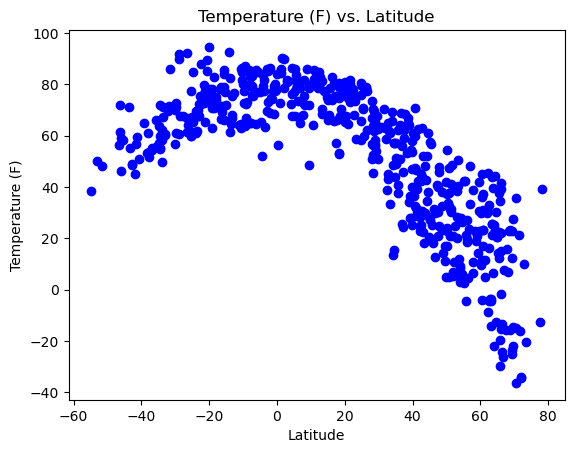

In [54]:
# Build scatter plot for latitude vs. temperature (f)
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
## Analysis

#### Latitude Vs. Humidity

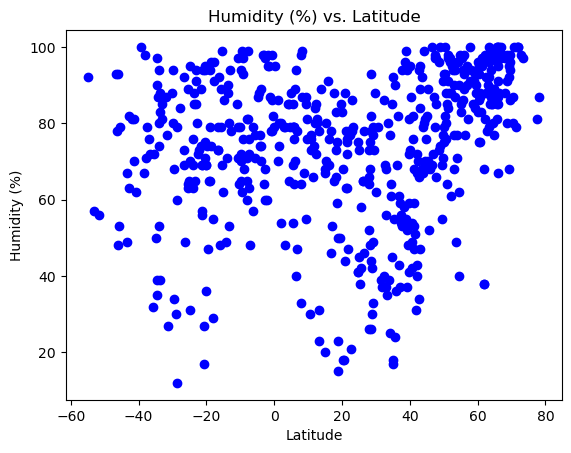

In [53]:
# Build the scatter plots for latitude vs. humidity
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
## Analysis

#### Latitude Vs. Cloudiness

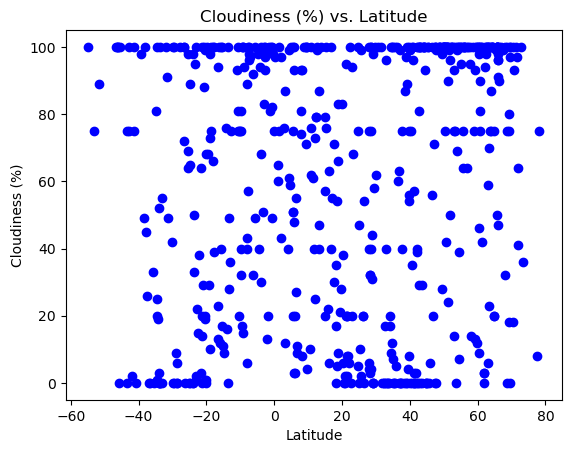

In [52]:
# Build the scatter plots for latitude vs. cloudiness
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
## Analysis

#### Latitude vs. Wind Speed Plot

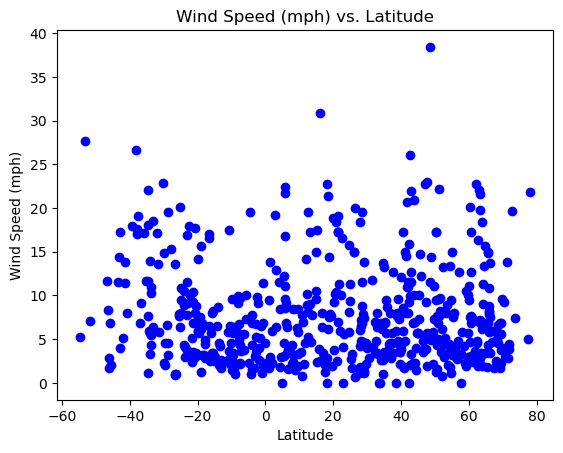

In [51]:
# Build the scatter plots for latitude vs. wind speed
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
## Analysis

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,50.94,64,100,6.06,US,1668999658
1,bambous virieux,-20.3428,57.7575,76.21,71,19,8.79,MU,1668999659
2,scituate,42.1959,-70.7259,30.49,43,39,8.01,US,1668999659
3,atuona,-9.8000,-139.0333,77.49,72,32,9.64,PF,1668999660
4,tasiilaq,65.6145,-37.6368,37.56,81,100,14.90,GL,1668999661
...,...,...,...,...,...,...,...,...,...
555,hay river,60.8156,-115.7999,16.86,96,90,7.67,CA,1669000067
556,vallenar,-28.5708,-70.7581,67.64,60,0,3.20,CL,1669000068
557,westport,41.1415,-73.3579,31.82,47,0,14.97,US,1668999895


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,50.94,64,100,6.06,US,1668999658
2,scituate,42.1959,-70.7259,30.49,43,39,8.01,US,1668999659
4,tasiilaq,65.6145,-37.6368,37.56,81,100,14.90,GL,1668999661
7,sharan,54.8167,54.0000,5.04,98,100,1.10,RU,1668999664
8,fuling,29.7022,107.3919,62.60,88,100,2.21,CN,1668999664


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bambous virieux,-20.3428,57.7575,76.21,71,19,8.79,MU,1668999659
3,atuona,-9.8000,-139.0333,77.49,72,32,9.64,PF,1668999660
5,ushuaia,-54.8000,-68.3000,38.62,92,100,5.30,AR,1668999662
6,kirakira,-10.4544,161.9205,84.90,71,20,6.51,SB,1668999371
9,manggar,-2.8833,108.2667,86.11,64,83,5.26,ID,1668999665


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7376137493063405


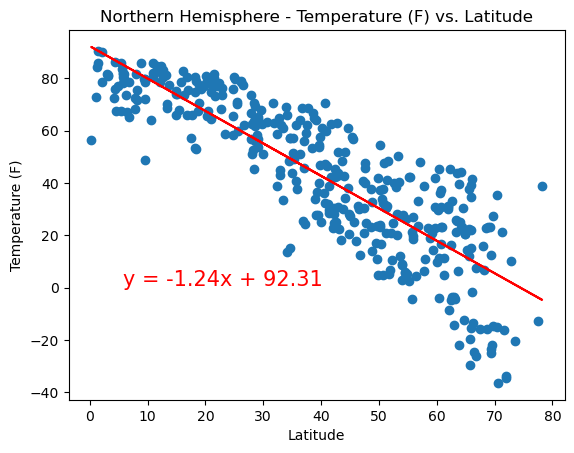

In [34]:
# Linear regression on Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis

The r-value is: 0.3939387157395078


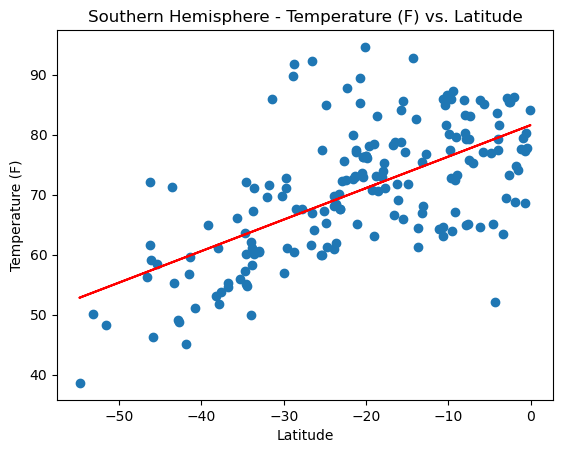

In [50]:
# Linear regression on Southern Hemisphere
%matplotlib inline
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16184625971838718


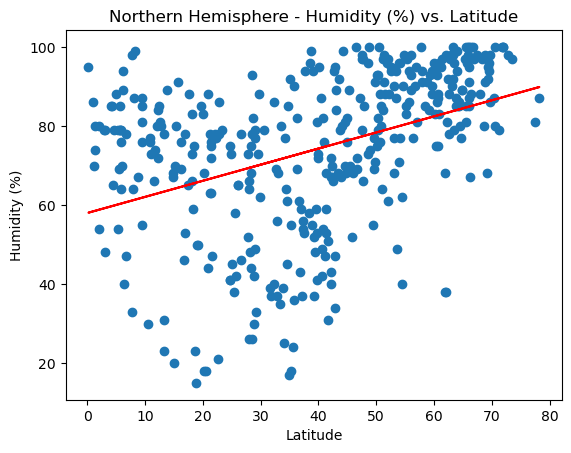

In [49]:
# Northern Hemisphere
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis

The r-value is: 0.030647174492798544


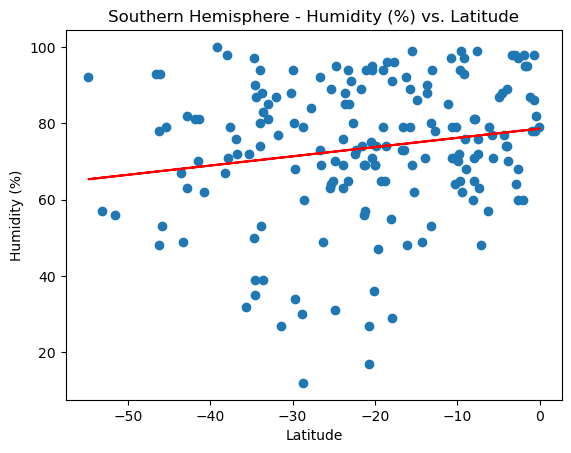

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05896603881938777


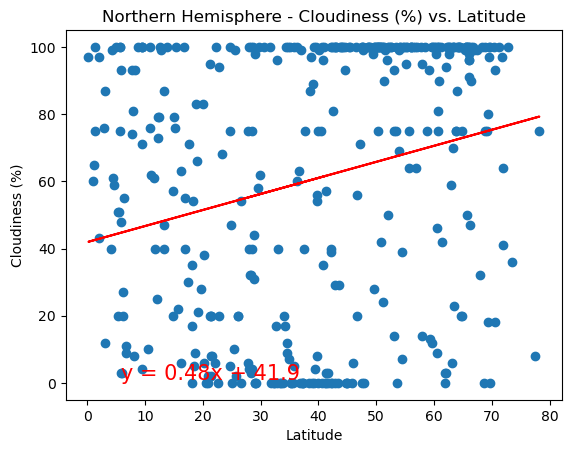

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()


In [ ]:
## Analysis

The r-value is: 0.030245178499882473


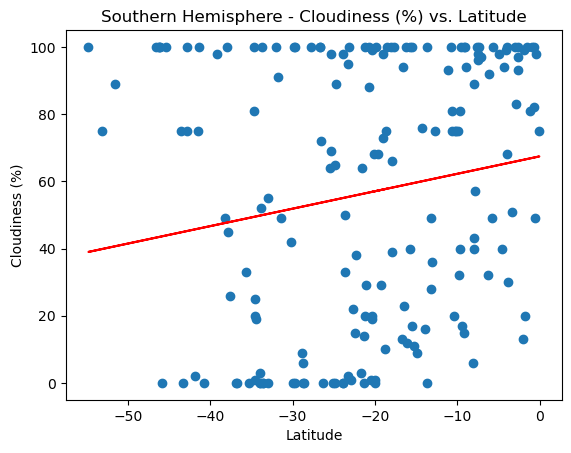

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007732791452847526


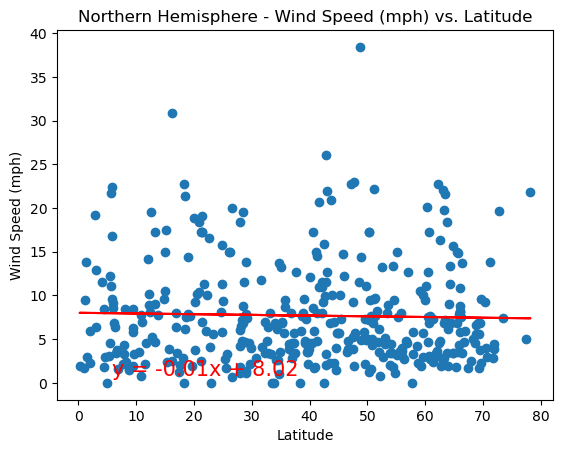

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis

The r-value is: 0.14595183702704764


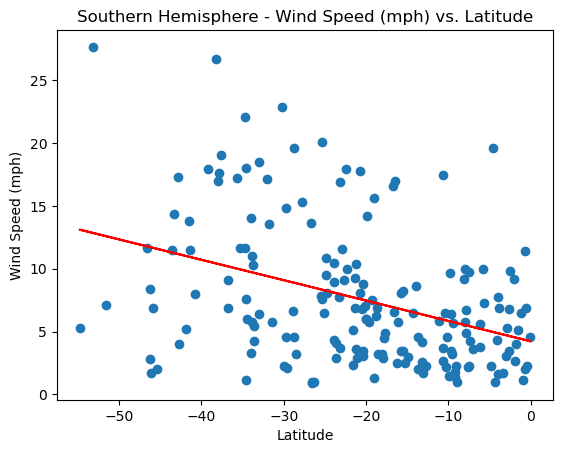

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
print(f"The r-value is: {rvalue**2}")
plt.show()

In [ ]:
## Analysis